# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

**Answer**: If a user buys 100 loot boxes, they will get approximately 15 elixirs.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

**Answer**:
- One needs to purchase 7 boxes in order to definitely get an elixir.
- Mathematically, the expectation _E_ of the number of trials to first occurrence of an event _V_ in a sequence of trials is _E_ = 1/_p_.
- Given than the probability of getting an elixir = 0.15 = 3/20, _E_ = 20/3 = 6.666667 = 7 (rounded up to nearest integer).

#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

**Answer**: X is discrete as it can be counted. X is a random variable as its value changes if an elixir is observed and remains the same if an elixir is not observed.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

**Answer**: Binomial distribution. There are binary outcomes (success vs. failure) with multiple trials (opening 100 loot boxes).

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Show your work; leave your answer in a comment.
p_elixir = 0.15
trials = 100
loot_dist = stats.binom(trials,p_elixir)

prob_less_than_20 = 0

for box in range(21): # open 20 boxes
    prob_less_than_20 += loot_dist.pmf(box) # add probabilities for each specific number of boxes opened

prob_more_than_20 = 1 - prob_less_than_20

print(f"The probability that a user gets more than 20 elixirs by opening 100 boxes is {prob_more_than_20:.1%}.")

The probability that a user gets more than 20 elixirs by opening 100 boxes is 6.6%.


#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

In [3]:
# Show your work; leave your answer in a comment.

prob_more_than_20_cdf = 1-loot_dist.cdf(20)

print(f"The probability that a user gets more than 20 elixirs by opening 100 boxes is {prob_more_than_20_cdf:.1%}.")

The probability that a user gets more than 20 elixirs by opening 100 boxes is 6.6%.


#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

**Answer**: Looking at the bar chart below, the number and size of bars after '20' on the horizontal axis represents 6.6% of all the bars. This means that there's an approximately 6.6% chance that a user gets more than 20 elixirs if he earns 100 loot boxes.

<BarContainer object of 101 artists>

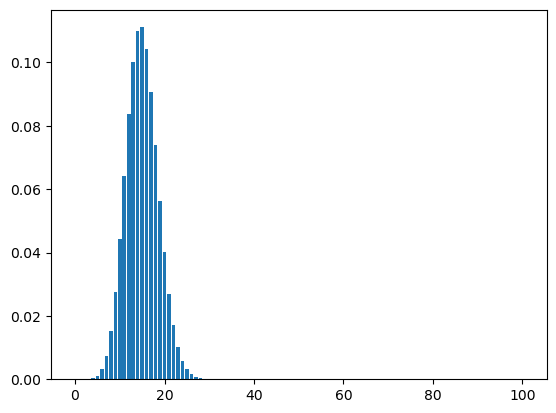

In [4]:
loot_outcomes = list(range(0,101))

plt.bar(loot_outcomes,
        loot_dist.pmf(loot_outcomes))

#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

**Answer**: Poisson distribution as it looks at the number of events occurring (purchasing loot boxes) within a given interval of time (one month).

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [5]:
# Show your work; leave your answer in a comment.

from statistics import mean

def min_users(min_val, max_val): # find the minimum number of users
    revenue = 0
    for users in range(min_val, max_val):
        revenue = np.random.poisson(2.7, users).sum()
        if revenue >= 500000:
            return users

def min_users_multiple(n, min_val, max_val): # simulate n times to take the mean of all n simulations
    sum_list = []
    for i in range (n):
        sum_list.append(min_users(min_val, max_val))
    return int(round(mean(sum_list), -3)) # round to nearest 1000

min_users_multiple(10, 184000, 190000) # take 184000 as the lower bound to reduce number of iterations to reach minimum users

# At least 185000 users are needed.

185000

#### 4c. Assume that your platform has the number of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [6]:
# Show your work; leave your answer in a comment.

from statistics import mean

def money_earned_high(num_users):
    
    loots_purchased = np.random.poisson(2.7, num_users)
    high_val_revenue = 0
    
    for amt in loots_purchased:
        if amt >= 5:
            high_val_revenue += amt
    
    return high_val_revenue

def money_earned_low(num_users):
    
    loots_purchased = np.random.poisson(2.7, num_users)
    low_val_revenue = 0
    
    for amt in loots_purchased:
        if amt < 5:
            low_val_revenue += amt
    
    return low_val_revenue

def money_earned_multiple(n, num_users):
    high_val_rev_list = []
    low_val_rev_list = []
    for i in range (n):
        high_val_rev_list.append(money_earned_high(num_users))
        low_val_rev_list.append(money_earned_low(num_users))
    print(f"The revenue earned from high value users is ${int(round(mean(high_val_rev_list), -3))}")
    print(f"The revenue earned from low value users is ${int(round(mean(low_val_rev_list), -3))}")

money_earned_multiple(40, 185000)

The revenue earned from high value users is $143000
The revenue earned from low value users is $357000


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

**Answer**:
1. Number of users who purchased at least 1 loot box (defined as paying users)
2. Number of users who purchased 0 loot boxes (defined as free users)
3. Proportion of paying users vs. free users (in %)
4. Number of high value users (minimum 5 loot boxes purchased)
5. Proportion of low vs. high value users (in %)

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes someone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [7]:
def find_elixir():
    record = []
    counter = 1
    for _ in range(100000):
        while np.random.choice(['elixir','no_elixir'],p=[0.15,0.85]) == 'no_elixir':
            counter += 1
        record.append(counter)
        counter = 1
    return record

print(f"5th percentile: {np.percentile(find_elixir(), 5)}")
print(f"25th percentile: {np.percentile(find_elixir(), 25)}")
print(f"50th percentile: {np.percentile(find_elixir(), 50)}")
print(f"75th percentile: {np.percentile(find_elixir(), 75)}")
print(f"95th percentile: {np.percentile(find_elixir(), 95)}")
print(f"mean: {mean(find_elixir())}")

5th percentile: 1.0
25th percentile: 2.0
50th percentile: 5.0
75th percentile: 9.0
95th percentile: 19.0
mean: 6.69302


**Answer**: It takes someone around 5 to 7 boxes to open their first elixir.

### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

**Answer**: Dictionary where key is the item type as string, and value is the corresponding number of trials.

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

**Answer**:
1. Proportion of paying users vs. free users (in %) in V1 and V2
2. Proportion of low vs. high value users (in %) in V1 and V2
3. Total revenue generated in V1 and V2
4. Average hours played per user in V1 and V2